In [ ]:
!pip install umap-learn
!pip install hdbscan
!pip install autofeat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 901.0 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82830 sha256=4418e14f58b99c9e401a3f591dac1f8c85b92a5481dbd4c2277149540ffadbc0
  Stored in directory: /root/.cache/pip/wheels/f4/3e/1c/596d0a463d17475af648688443fa4846fef624d1390339e7e9
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55509 sha256=42f146e4eea291d677b4d3cb7f233523f46dfdf83f496fc1cae550a3842fd88b
  Stored in directory: /root/.cache/pip/wheels/b9/89/cc/59ab91ef5b21dc2ab3635528d7d227f49dfc9169905dcb959d
Successfully built umap-learn pynndescent
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/p

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
import umap.umap_ as umap
import hdbscan
import seaborn as sns
from autofeat.autofeat import AutoFeatRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv("/content/df_notcorr.csv")

In [ ]:
df_desc = df.select_dtypes(include = ['float', 'int']).replace([np.inf, -np.inf], np.nan)
df_desc = df_desc.dropna()

## Clustering

Early we chose umap as a dimension reduction instrument. Now we can try to cluster these data. We will use hdbscan for it.

In [ ]:
clusterable_embedding = umap.UMAP(
        n_neighbors=15,
        min_dist=0.8, 
        n_components=2,
        random_state=42,
        metric='minkowski',
    ).fit_transform(df_desc)

In [ ]:
labels = hdbscan.HDBSCAN(
    min_samples=1,
    min_cluster_size=15
).fit_predict(clusterable_embedding)

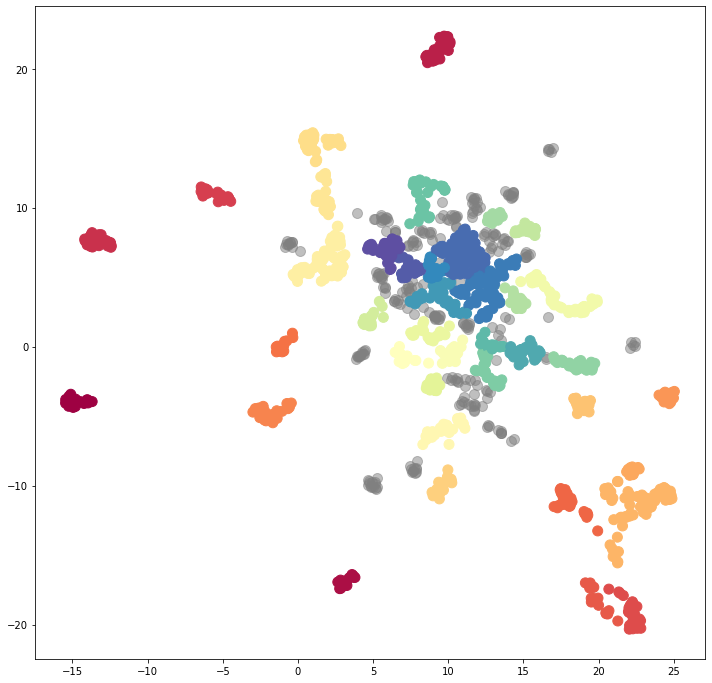

In [ ]:
clustered = (labels >= 0)
fig, axs = plt.subplots(figsize=(12, 12))
plt.scatter(clusterable_embedding[~clustered, 0],
            clusterable_embedding[~clustered, 1],
            color=(0.5, 0.5, 0.5),
            s=100,
            alpha=0.5)
plt.scatter(clusterable_embedding[clustered, 0],
            clusterable_embedding[clustered, 1],
            c=labels[clustered],
            s=100,
            cmap='Spectral')

For chemical data, and this situation we don't have strong dependencies or clusters, so we chose the best from umap transformation and clusters are located not bad, but and not very good.

We can try to use kmeans, let's see knee

In [ ]:
sc = MinMaxScaler(feature_range=(0, 1))
X = sc.fit_transform(df_desc)

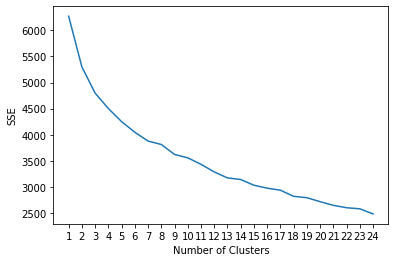

In [ ]:
sse_1 = []
for k in range(1, 25):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    sse_1.append(kmeans.inertia_)
plt.plot(range(1, 25), sse_1)
plt.xticks(range(1, 25))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

So as we mention above, we don't have a good dependencies for clusters.

## Autofeat

For automated feature engineering, we chose Autofeat. Some features got nan in the calculation, we chose features without this problem.

In [ ]:
X = df_desc[[
#     'AATS0Z',
#  'AATS0d',
#  'AATS0dv',
#  'AATS0i',
#  'AATS0p',
#  'AATS0v',
#  'AATSC0Z',
#  'AATSC0d',
#  'AATSC0dv',
#  'AATSC0i',
#  'AATSC0p',
#  'AATSC0v',
#  'ATSC0Z',
#  'ATSC0p',
#  'ATSC1Z',
#  'ATSC1dv',
#  'ATSC1i',
#  'ATSC1p',
#  'ATSC1v',
#  'ATSC2Z',
#  'ATSC2d',
#  'ATSC2dv',
 'ATSC2i',
 'ATSC2p',
 'ATSC2v',
 'ATSC3Z',
 'ATSC3d',
 'ATSC3dv',
 'ATSC3i',
 'ATSC3p',
 'ATSC3v',
 'ATSC4Z',
 'ATSC4d',
 'ATSC4dv',
 'ATSC4i',
 'ATSC4p',
 'ATSC4v',
 'ATSC5Z',
 'ATSC5d',
 'ATSC5dv',
 'ATSC5i',
 'ATSC5p',
 'ATSC5v',
 'ATSC6Z',
 'ATSC6d',
 'ATSC6dv',
 'ATSC6i',
 'ATSC6p',
 'ATSC6v',
 'ATSC7Z',
 'ATSC7d',
 'ATSC7dv',
 'ATSC7i',
 'ATSC7p',
 'ATSC7v',
 'ATSC8Z',
 'ATSC8d',
 'ATSC8dv',
 'ATSC8i',
 'ATSC8p',
 'ATSC8v',
 'C1SP1',
 'C1SP2',
 'C1SP3',
 'C2SP2',
 'C2SP3',
 'C3SP2',
 'C3SP3',
 'C4SP3',
 'CIC1',
 'CIC2',
 'CIC3',
 'FilterItLogS',
 'GGI1',
 'GGI10',
 'GGI4',
 'GGI9',
 'IC0',
 'IC1',
 'JGI1',
 'JGI2',
 'JGT10',
 'MIC0',
 'MIC1',
 'MPC10',
 'MPC5',
 'MPC7',
 'MPC8',
 'MPC9',
 'NaaN',
 'NaaO',
 'NaaaC',
 'NaasC',
 'NaasN',
 'NdCH2',
 'NdO',
 'NdS',
 'NddC',
 'NddsN',
 'NddssS',
 'NdsCH',
 'NdsN',
 'NdssC',
 'NdssS',
 'NdsssP',
 'NsBr',
 'NsCH3',
 'NsCl',
 'Xc-3d',
 'Xc-4d',
 'Xc-5d',
 'Xc-6d',
 'Xch-4d',
 'Xch-7d',
 'Xpc-4d',
 'bpol',
 'n10FAHRing', 
 'n10FARing',
 'n10FHRing',
 'n10FRing',
 'n3AHRing',
 'n4AHRing',
 'n4ARing',
 'n5AHRing',
 'n5ARing',
 'n5HRing',
 'n6AHRing',
 'n6ARing',
 'n6HRing',
 'n6Ring',
 'nAcid',
 'nBase',
 'nBondsD',
 'nBondsKD',
 'nBondsT',
 'nBr',
 'nCl',
 'nF',
 'nFAHRing',
 'nFARing',
 'nFHRing',
 'nI',
 'nN',
 'nO',
 'nP',
 'nS',
 'ATS_group',
 'BCUT2D_group'
]]
y = df_desc[['raw_value']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
model = AutoFeatRegressor(apply_pi_theorem=True, categorical_cols=None,
          feateng_cols=None, feateng_steps=2, featsel_runs=3,
          transformations=('exp', 'log', 'abs', 'sqrt', '^2', '^3',),)
model

AutoFeatRegressor(featsel_runs=3,
                  transformations=('exp', 'log', 'abs', 'sqrt', '^2', '^3'))

In [ ]:
X_train_feature_creation = model.fit_transform(X_train.to_numpy(), y_train.to_numpy().flatten())

In [ ]:
X_test_feature_creation = model.transform(X_test.to_numpy())
X_test_feature_creation

,x000,x001,x002,x003,x004,x005,x006,x007,x008,x009,...,x123,x124,x125,x008**3*sqrt(x109),x016**2*x043**3,x040*sqrt(x095),x108**2*x123**3,sqrt(x044)*x076**2,sqrt(x067)*x123**3,sqrt(x091)*exp(x072)
0,7.890985,1.428302,335.403414,-28.667969,-4.824219e+00,-40.480469,-21.013515,-3.538425,-566.610085,-118.949219,...,0.0,112.452335,2.038668,-0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
1,24.185670,0.019690,-67.948711,-24.612245,-7.724490e+00,-17.755102,-25.303051,-1.313541,-161.598148,-18.489796,...,0.0,342.616261,2.073490,-0.0,207.229358,0.0,0.0,0.0,0.0,0.691120
2,1.442819,0.130990,25.465076,-44.917160,-4.639053e+00,-36.378698,-4.519569,-0.775927,-188.140970,-23.467456,...,0.0,115.385524,2.153209,-0.0,0.756591,0.0,0.0,0.0,0.0,0.343295
3,0.685582,-0.854511,-105.450707,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,87.502635,2.492964,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
4,6.706775,1.823612,783.623497,-64.860118,-1.490675e+01,4.969670,-25.554001,-4.729304,-990.489334,-19.002263,...,0.0,475.577002,1.942939,-0.0,31606.468640,0.0,0.0,0.0,0.0,1.402362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,-8.239298,-1.431133,-381.094556,-12.187500,9.251859e-17,6.812500,12.814631,1.841555,110.929971,8.750000,...,0.0,181.846196,2.042151,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
481,0.617665,0.083714,3.827631,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,32.527606,2.306383,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
482,-5.560236,-1.137043,-279.006473,-82.000000,-1.419753e+00,-30.000000,-4.056631,-0.943423,-379.444894,50.000000,...,0.0,162.948049,2.037362,-0.0,0.009755,0.0,0.0,0.0,0.0,0.268642
483,-8.273265,-1.161297,-266.136298,15.306122,-2.882653e+00,11.877551,-10.822928,-1.494262,-127.336102,-17.755102,...,0.0,142.352388,2.134620,-0.0,0.000000,0.0,0.0,0.0,0.0,0.242746


In [ ]:
X_test_feature_creation.columns

In [ ]:
for i in ['x001', 'x001**3*x011', 'x011']:
  plt.scatter(X_test_feature_creation[i], y_test, alpha=0.3)
  plt.title(i)
  plt.show()

As we can see in common there is no strong good relation between target value and generated feature, and when we see some dependencies, the original features also have them. Maybe descriptors in general not very good for this target.

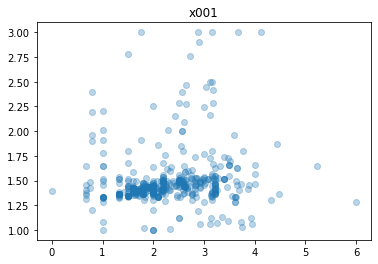

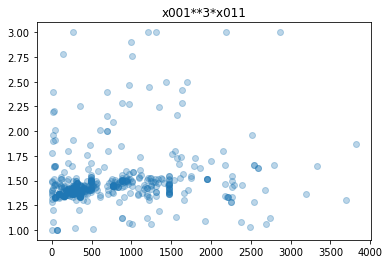

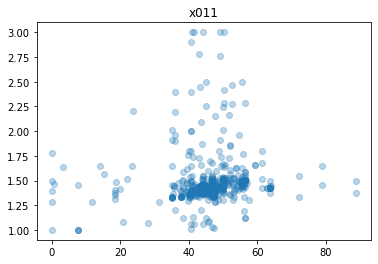

In [ ]:
#  'AATS0d' 'AATSC0v'
for i in ['x001', 'x001**3*x011', 'x011']:
  plt.scatter(X_test_feature_creation[i], y_test, alpha=0.3)
  plt.title(i)
  plt.show()

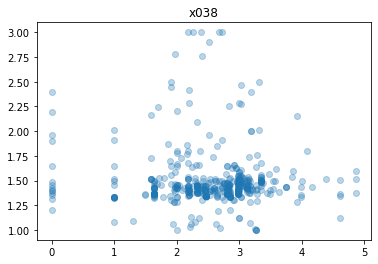

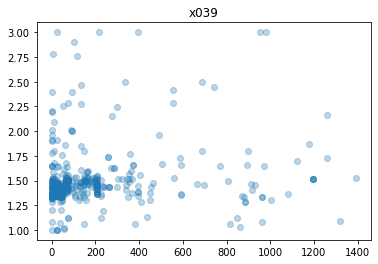

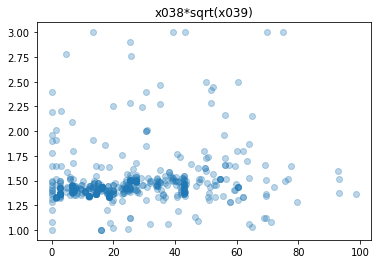

In [ ]:
for i in ['x038', 'x039', 'x038*sqrt(x039)']:
  plt.scatter(X_test_feature_creation[i], y_test, alpha=0.3)
  plt.title(i)
  plt.show()